<h1>Prediksi Jenis Obat dengan Random Forest</h1>

## Random Forest

__Random Forest__ merupakan salah satu algoritma <i>supervised learning</i> yang dapat digunakan untuk masalah klasifikasi maupun regresi. Algoritma ini didasarkan pada konsep <i>ensemble learning</i> yang menggabungkan beberapa <i>classifiers</i> untuk memecahkan masalah yang kompleks serta meningkatkan kinerja model.

<i>Random forest</i> adalah <i>classifier</i> yang berisi sejumlah <i>decision tree</i> pada berbagai subset dari dataset yang diberikan dan mengambil rata-ratanya. Jadi, algoritma ini mengambil hasil mayoritas prediksi <i>decision tree</i> dan memprediksi hasil akhirnya. Semakin banyak jumlah pohon, akan semakin besar kemungkinan lebih tinggi nilai akurasinya serta mencegah masalah <i>overfitting</i>.

## Dataset

Dataset <a href='https://www.kaggle.com/prathamtripathi/drug-classification'>Drug Classification</a> 

tujuan untuk mengklasifikasikan tipe obat.

Kelas target:

* __Drug:__ Tipe obat

Fitur set:

* __Age:__ Usia
* __Sex:__ Jenis kelamin
* __BP:__ Level tekanan darah (Blood Pressure)
* __Cholesterol:__ Level kolesterol
* __Na_to_K:__ Rasio Natrium (Na) dengan Kalium (K)


<i>import library</i> yang diperlukan terlebih dahulu.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

<i>load</i> dataset ke dalam dataframe Pandas dengan <code>read_csv()</code>.

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
%cd /content/gdrive/My Drive/Colab Notebooks/DATASET/datasets_py/

/content/gdrive/My Drive/Colab Notebooks/DATASET/datasets_py


In [ ]:
# Load dataset

df = pd.read_csv('drug.csv')
df.head(10)

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,DrugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,DrugY
5,22,F,NORMAL,HIGH,8.607,drugX
6,49,F,NORMAL,HIGH,16.275,DrugY
7,41,M,LOW,HIGH,11.037,drugC
8,60,M,NORMAL,HIGH,15.171,DrugY
9,43,M,LOW,NORMAL,19.368,DrugY


## Analisis dan visualisasi data

In [ ]:
# Menampilkan info singkat

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          200 non-null    int64  
 1   Sex          200 non-null    object 
 2   BP           200 non-null    object 
 3   Cholesterol  200 non-null    object 
 4   Na_to_K      200 non-null    float64
 5   Drug         200 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 9.5+ KB


menampilkan jumlah data pada tiap kategori di kolom <code>Drug</code> dengan visualisasi <code>countplot()</code>.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


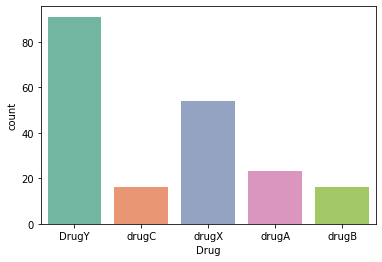

In [ ]:
# Countplot untuk kolom 'Drug'

sns.countplot(df['Drug'], palette='Set2')

tampilkan <i>countplot</i> untuk kolom <code>Drug</code> berdasarkan <code>Sex</code>.

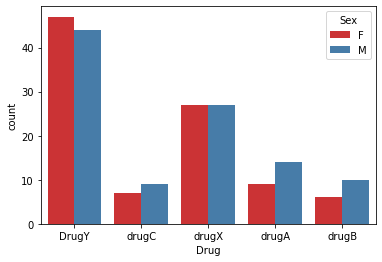

In [ ]:
# Countplot untuk kolom 'Drug' berdasarkan 'Sex'

sns.countplot(x='Drug', hue='Sex', data=df, palette='Set1')

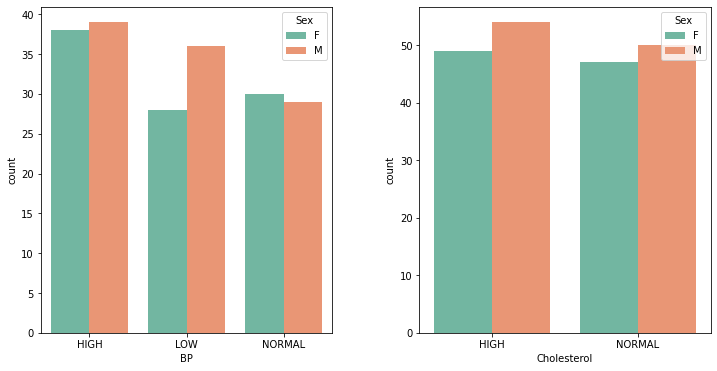

In [ ]:
# Menampilkan countplot

fig, ax = plt.subplots(ncols=2, nrows=1, figsize=(12, 6)) 

# Menambahkan subplot dengan indexing
ax0 = fig.add_subplot(ax[0]) 
ax1 = fig.add_subplot(ax[1])    

sns.countplot(x='BP', hue='Sex', data=df, palette='Set2', ax=ax0)
sns.countplot(x='Cholesterol', hue='Sex', data=df, palette='Set2', ax=ax1)

plt.subplots_adjust(wspace=0.3)
plt.show()

<i>scatter plot</i> untuk 50 data pertama yang diberi warna berdasarkan tipe obat.

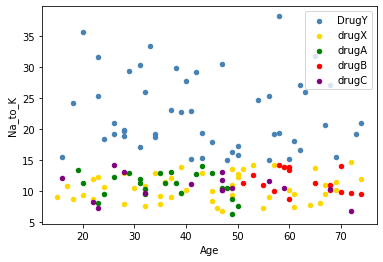

In [ ]:
# Membuat scatter plot untuk 50 data pertama

x = df[df['Drug'] == 'DrugY'][0:50].plot(kind='scatter', x='Age', y='Na_to_K', color='SteelBlue', label='DrugY');

df[df['Drug'] == 'drugX'][0:50].plot(kind='scatter', x='Age', y='Na_to_K', color='Gold', label='drugX', ax=x);
df[df['Drug'] == 'drugA'][0:50].plot(kind='scatter', x='Age', y='Na_to_K', color='Green', label='drugA', ax=x);
df[df['Drug'] == 'drugB'][0:50].plot(kind='scatter', x='Age', y='Na_to_K', color='Red', label='drugB', ax=x);
df[df['Drug'] == 'drugC'][0:50].plot(kind='scatter', x='Age', y='Na_to_K', color='Purple', label='drugC', ax=x);
plt.show()

## Data Preparation / Preprocessing

Sekarang kita definisikan data fitur.

In [ ]:
# Mendefinisikan data fitur

X = df[['Age', 'Sex', 'BP', 'Cholesterol', 'Na_to_K']].values
X[0:5]

array([[23, 'F', 'HIGH', 'HIGH', 25.355],
       [47, 'M', 'LOW', 'HIGH', 13.093],
       [47, 'M', 'LOW', 'HIGH', 10.114],
       [28, 'F', 'NORMAL', 'HIGH', 7.798],
       [61, 'F', 'LOW', 'HIGH', 18.043]], dtype=object)

### Encoding

<i>encoding</i> dengan <code>LabelEncoder()</code> untuk data bertipe kategori, seperti <code>Sex</code>, <code>BP</code>, dan <code>Cholesterol</code>.

In [ ]:
# Encoding data

from sklearn import preprocessing

enc_sex = preprocessing.LabelEncoder()
enc_sex.fit(['F','M'])
X[:,1] = enc_sex.transform(X[:,1]) 

enc_BP = preprocessing.LabelEncoder()
enc_BP.fit([ 'LOW', 'NORMAL', 'HIGH'])
X[:,2] = enc_BP.transform(X[:,2])

enc_Chol = preprocessing.LabelEncoder()
enc_Chol.fit([ 'NORMAL', 'HIGH'])
X[:,3] = enc_Chol.transform(X[:,3]) 

X[0:5]

array([[23, 0, 0, 0, 25.355],
       [47, 1, 1, 0, 13.093],
       [47, 1, 1, 0, 10.114],
       [28, 0, 2, 0, 7.798],
       [61, 0, 1, 0, 18.043]], dtype=object)

In [ ]:
# Mendefiniskan kelas target

y = df['Drug']
y[0:5]

0    DrugY
1    drugC
2    drugC
3    drugX
4    DrugY
Name: Drug, dtype: object

### Train test split

In [ ]:
from sklearn.model_selection import train_test_split

# Memisahkan data latih dan data uji
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

tampilkan 10 data pertama <code>X_train</code> dan <code>y_train</code>.

In [ ]:
# Print X_train dan y_train

print('X_train')
print(X_train[0:10])
print('\n')
print('y_train')
print(y_train[0:10])

X_train
[[67 1 2 1 9.514]
 [17 1 2 1 10.832]
 [19 0 0 0 13.313]
 [50 1 2 1 15.79]
 [43 1 0 0 13.972]
 [22 0 2 0 8.607]
 [35 1 2 1 7.845]
 [37 1 1 1 8.968]
 [23 1 2 0 31.686]
 [29 1 0 0 12.856]]


y_train
116    drugX
67     drugX
78     drugA
42     DrugY
17     drugA
5      drugX
127    drugX
105    drugX
48     DrugY
66     drugA
Name: Drug, dtype: object


tampilkan <code>X_test</code> dan <code>y_test</code>.

In [ ]:
# Print X_test dan y_test

print('X_test')
print(X_test[0:10])
print('\n')
print('y_test')
print(y_test[0:10])

X_test
[[60 1 2 1 10.091]
 [73 0 2 0 19.221]
 [53 1 2 0 14.133]
 [28 0 1 0 13.127]
 [18 0 0 0 37.188]
 [23 1 2 1 14.02]
 [36 1 1 1 11.424]
 [61 0 1 0 18.043]
 [45 1 1 0 17.951]
 [51 0 1 1 23.003]]


y_test
58     drugX
40     DrugY
34     drugX
102    drugC
184    DrugY
198    drugX
95     drugX
4      DrugY
29     DrugY
168    DrugY
Name: Drug, dtype: object


## Modeling

### Klasifikasi dengan Random Forest

Untuk membuat model <i>machine learning</i> dengan <i>Random forest</i>, gunakan <code>RandomForestClassifier</code>.

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Membuat model dengan random forest
model_rf = RandomForestClassifier(n_estimators=80, criterion='entropy')
model_rf.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', n_estimators=80)

### Prediksi

uji model tersebut dengan <code>.predict()</code> menggunakan data <code>X_test</code>.

In [ ]:
# Menguji model

y_pred = model_rf.predict(X_test)

In [ ]:
# Menampilkan hasil prediksi dan data sebenarnya

print('prediksi:')
print(y_pred[0:10])
print('\nsebenarnya:')
print(y_test[0:10])

prediksi:
['drugX' 'DrugY' 'drugX' 'drugC' 'DrugY' 'drugX' 'drugX' 'DrugY' 'DrugY'
 'DrugY']

sebenarnya:
58     drugX
40     DrugY
34     drugX
102    drugC
184    DrugY
198    drugX
95     drugX
4      DrugY
29     DrugY
168    DrugY
Name: Drug, dtype: object


### Evaluasi

evaluasi kinerja model tersebut dengan <code>accuracy_score</code>.

In [ ]:
from sklearn import metrics

# Menampilkan akurasi
print('Akurasi Random Forest :', metrics.accuracy_score(y_test, y_pred))

Akurasi Random Forest : 0.9333333333333333


In [ ]:
from sklearn.metrics import classification_report

# Menampilkan classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       DrugY       1.00      1.00      1.00        27
       drugA       0.67      1.00      0.80         4
       drugB       1.00      0.67      0.80         6
       drugC       1.00      0.50      0.67         4
       drugX       0.90      1.00      0.95        19

    accuracy                           0.93        60
   macro avg       0.91      0.83      0.84        60
weighted avg       0.95      0.93      0.93        60



### Tree visualization

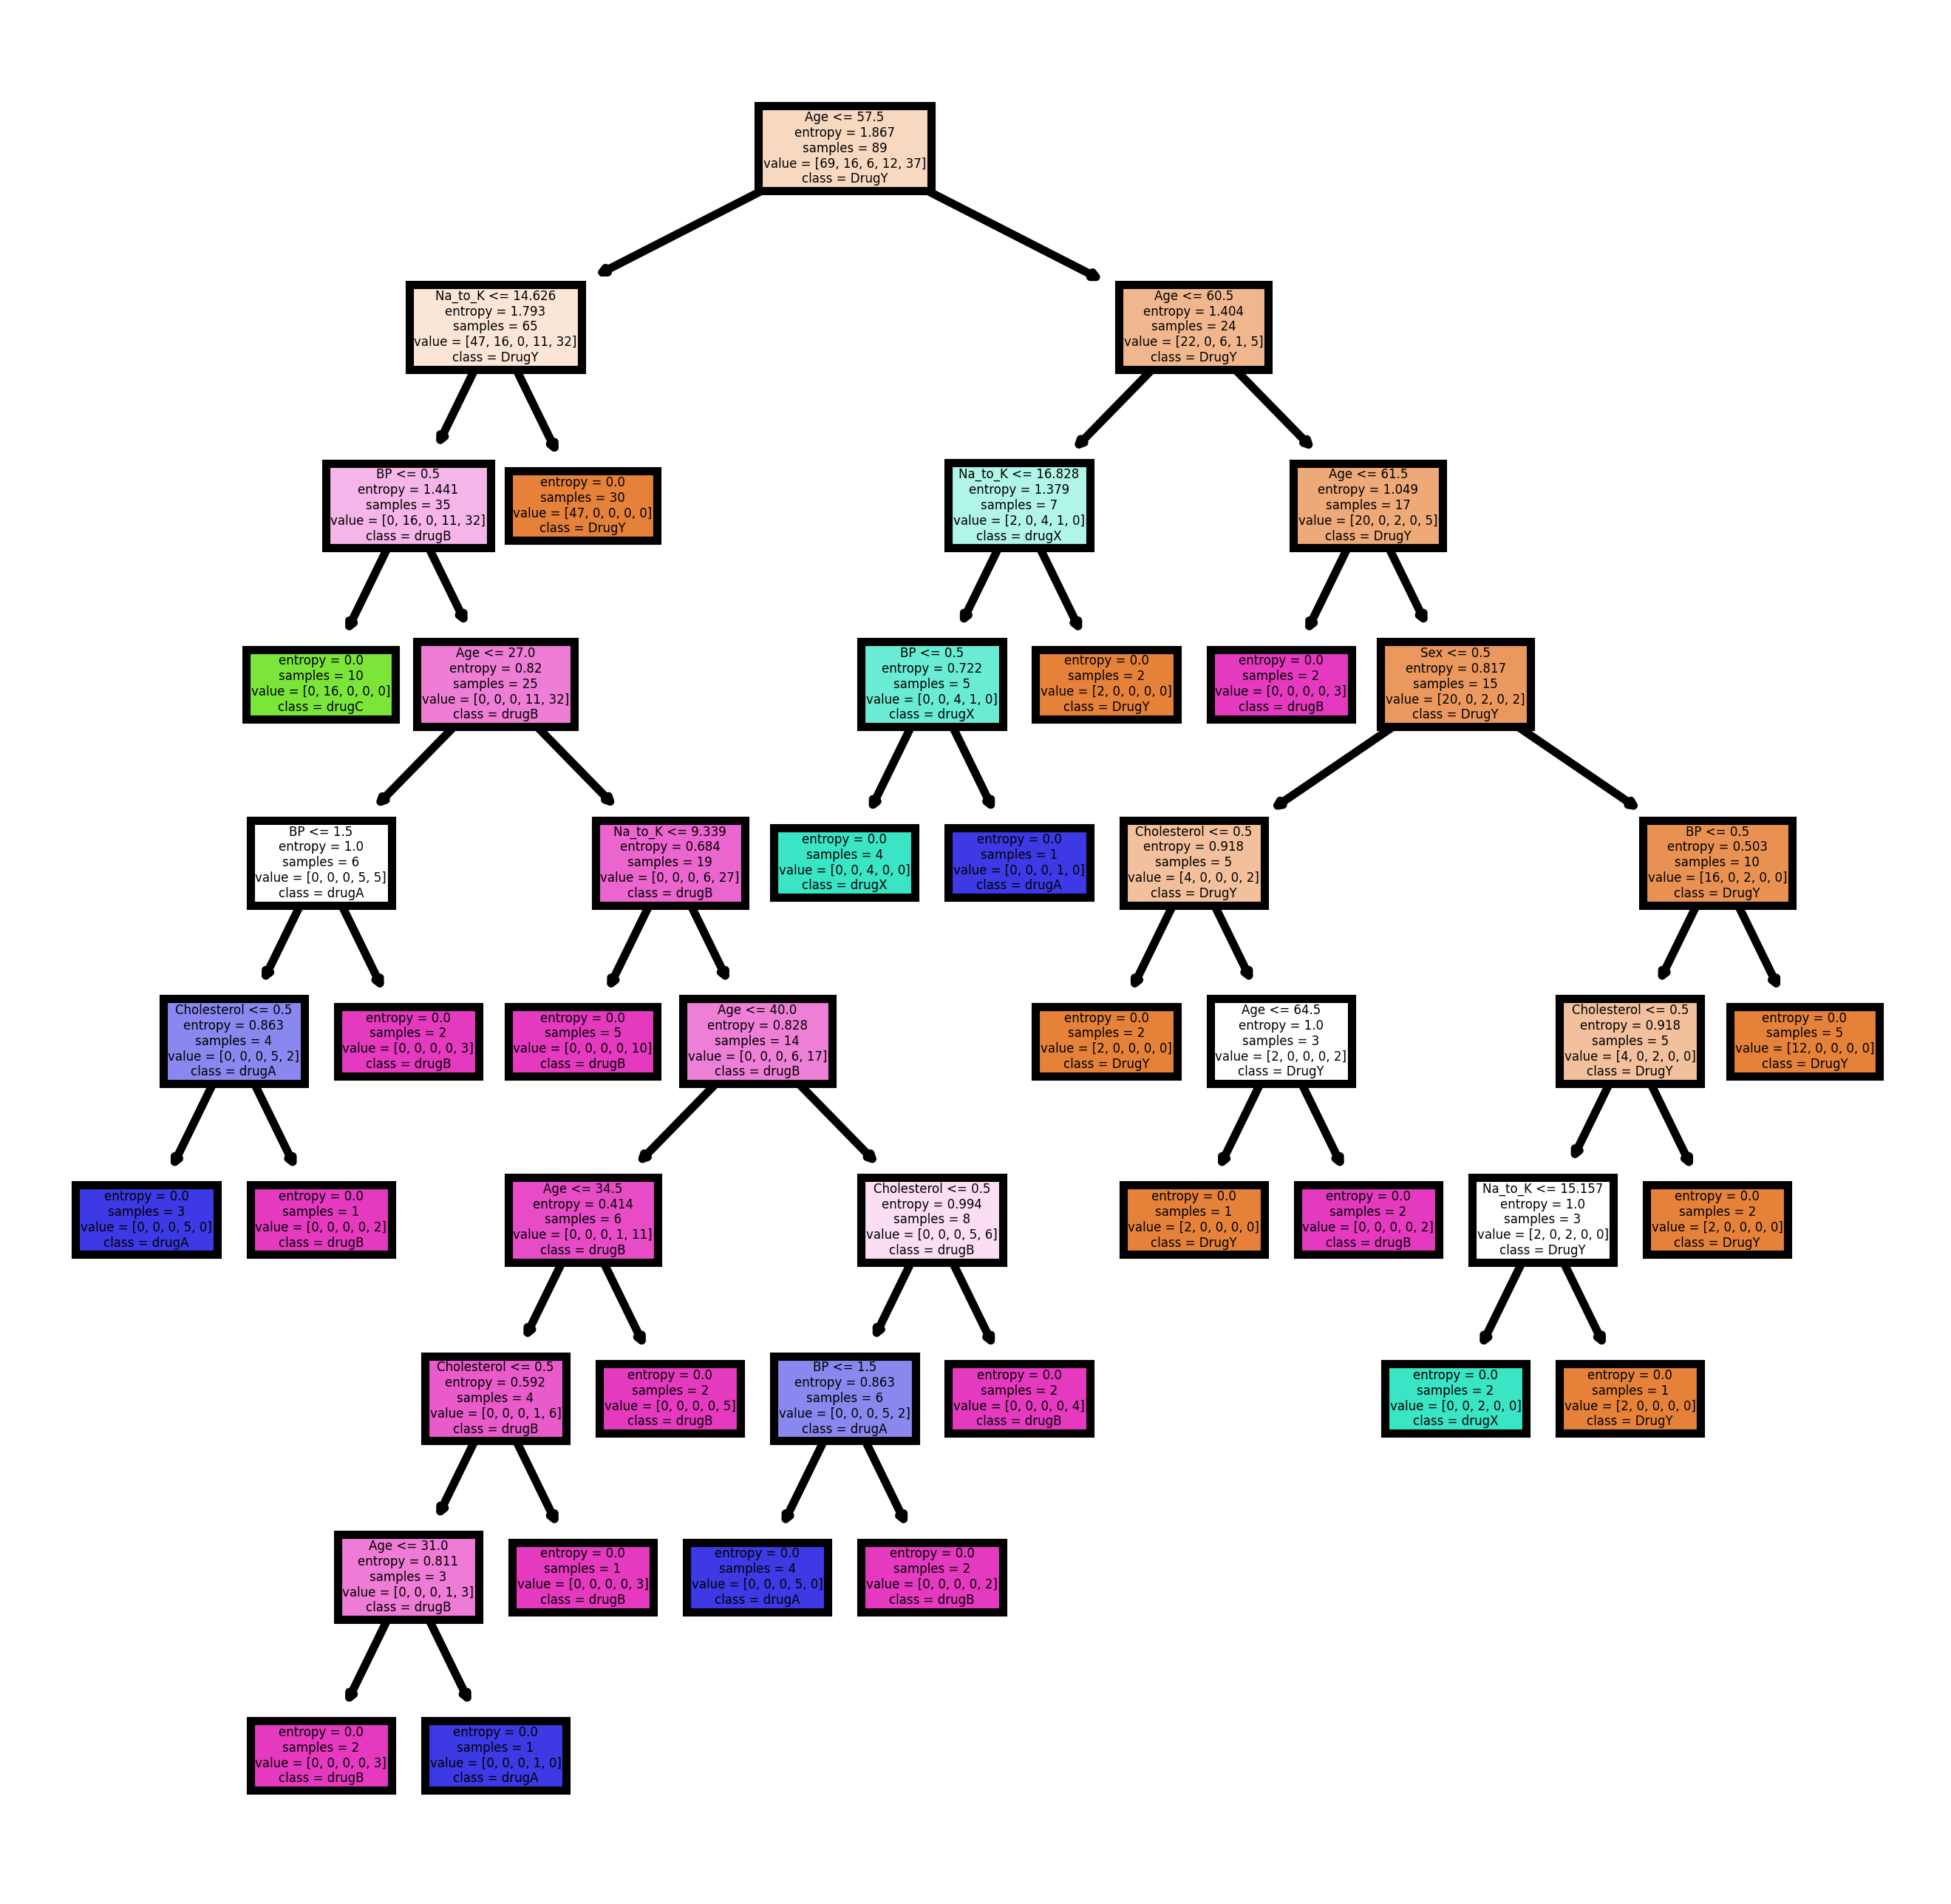

In [ ]:
from six import StringIO
import pydotplus
from sklearn.tree import plot_tree

featureNames = df.columns[0:5]
targetNames = df['Drug'].unique().tolist()
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=800)
plot_tree(model_rf.estimators_[0],
          feature_names = featureNames, 
          class_names=targetNames,
          filled = True);

fig.savefig('rf_individualtree.png')



---


Semoga Bermanfaat dan jangan lupa main-main kesini: <a href="https://nurpurwanto.github.io/">**nurpurwanto**</a> Terimakasih.

---


